# Digital Image Processing 

Adopted from : https://github.com/manupillai308/Introduction-to-Digital-Image-Processing

## What will we learn? 

* Image thresholding!
* Connected Components

### Single Digit

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
color_digit = cv2.imread("./digit.jpg")
digit = cv2.imread("./digit.jpg", cv2.IMREAD_GRAYSCALE)

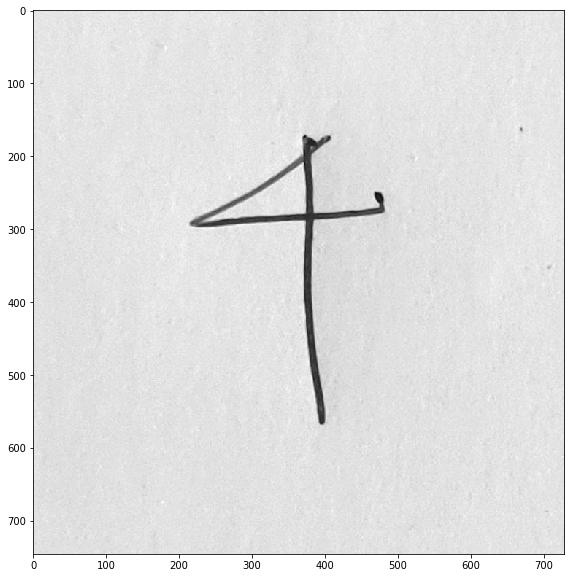

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(digit, cmap="gray")
plt.show()

In [7]:
def threshold(img, val):
    return 255*(img < val).astype(img.dtype)

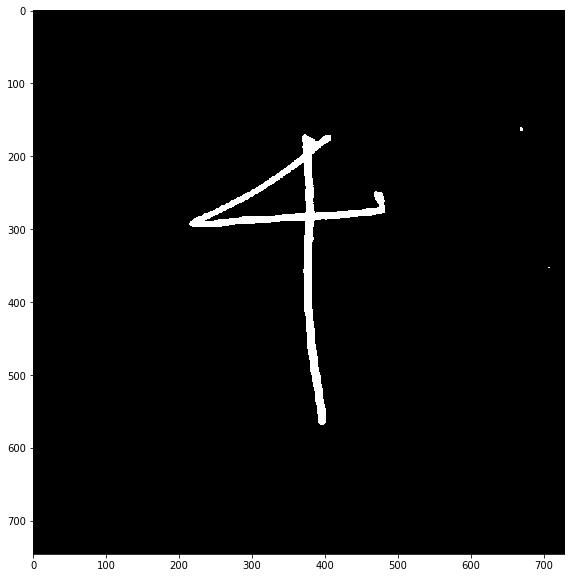

In [8]:
plt.figure(figsize=(10,10))

thresh = threshold(digit, 127)
plt.imshow(thresh, cmap="gray")
plt.show()

In [9]:
def get_bounding_box(img):

    points = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] == 255:
                points.append((i, j))
    
    points = np.array(points)
    x_min, y_min, x_max, y_max = points[:, 1].min(), points[:, 0].min(), points[:, 1].max(), points[:, 0].max()

    return x_min, y_min, x_max, y_max


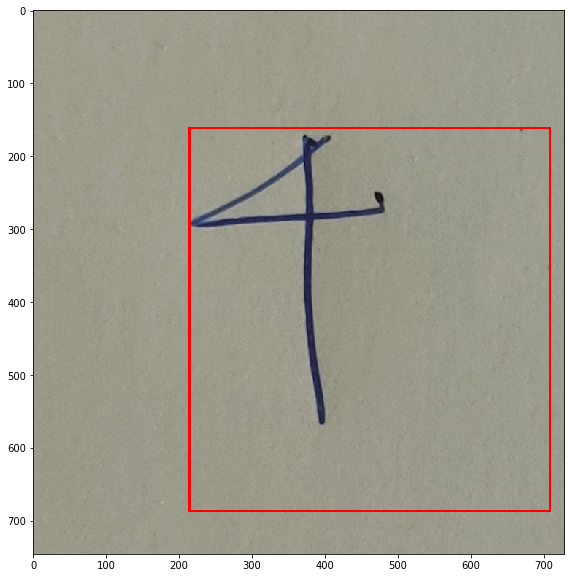

In [10]:
draw_img = color_digit.copy()

x_min, y_min, x_max, y_max = get_bounding_box(thresh)
cv2.rectangle(draw_img, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)

plt.figure(figsize=(10,10))
plt.imshow(draw_img[...,[2,1,0]])
plt.show()

In [11]:
def check_neighbour(img, pos, adjacency):
    neighbours = []
    i, j = pos
    r, c = img.shape
    if adjacency == 4:
        for x, y in [(i, j - 1), (i - 1, j), (i, j + 1), (i + 1, j)]:
            if x >= 0 and y >= 0 and x < r and y < c:
                neighbours.append((x, y))
    elif adjacency == 8:
        for x, y in [
            (i, j - 1),
            (i - 1, j - 1),
            (i - 1, j),
            (i - 1, j + 1),
            (i, j + 1),
            (i + 1, j + 1),
            (i + 1, j),
            (i + 1, j - 1),
        ]:
            if x >= 0 and y >= 0 and x < r and y < c:
                neighbours.append((x, y))
    return neighbours


def connected_components(img, V, adjacency):
    label = 1
    flag = np.zeros(img.shape).astype("bool")
    component = np.zeros(img.shape, dtype=img.dtype)
    queue = []
    groups = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (img[i][j] in V) and (not flag[i][j]):
                component[i][j] = label
                groups.append([(i, j)])
                flag[i][j] = True
                queue.insert(0, (i, j))
                while len(queue) > 0:
                    i, j = queue.pop()
                    neighbours = check_neighbour(img, (i, j), adjacency)
                    for neighbour in neighbours:
                        i, j = neighbour
                        if (img[i][j] in V) and (not flag[i][j]):
                            component[i][j] = label
                            groups[-1].append((i,j))
                            flag[i][j] = True
                            queue.insert(0, (i, j))
                label += 1
    return component, groups

In [12]:
components, groups = connected_components(thresh, [255], 8)

667 161 670 165


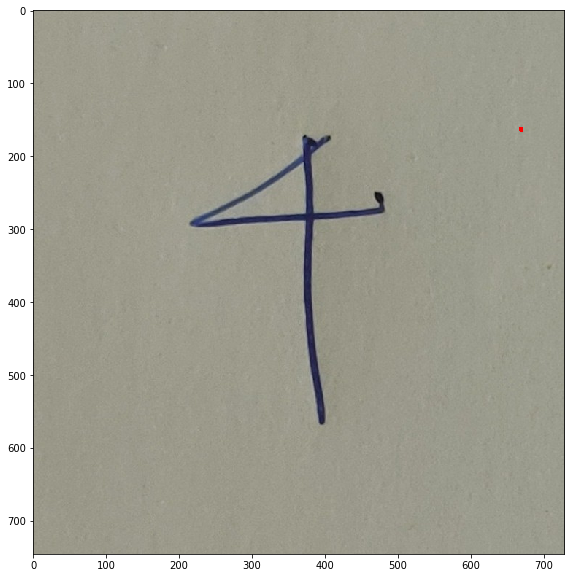

214 170 482 568


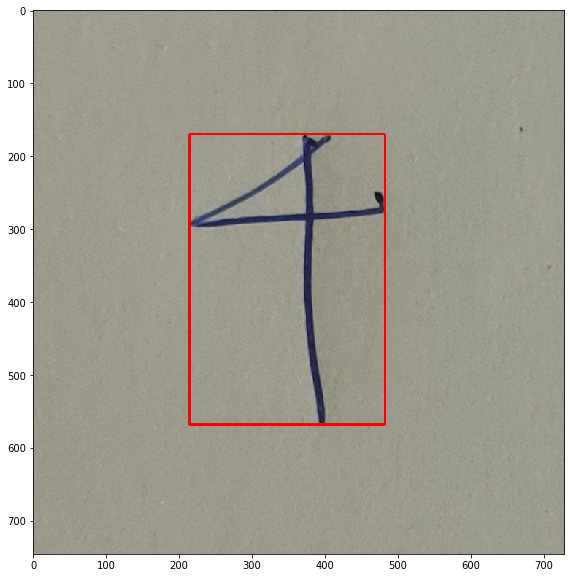

706 352 708 353


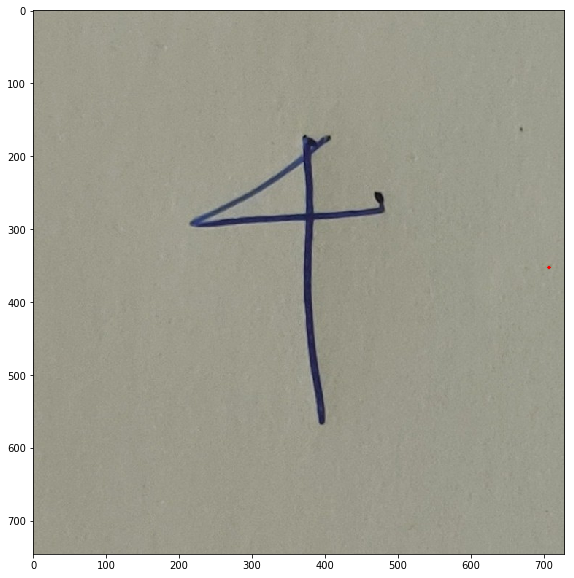

704 687 704 687


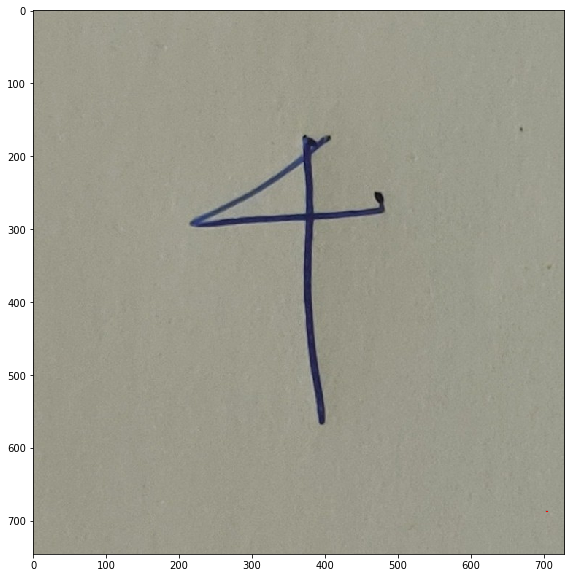

In [19]:
for group in groups:
    draw_img = color_digit.copy()

    group = np.array(group)
    x_min, y_min, x_max, y_max = group[:, 1].min(), group[:, 0].min(), group[:, 1].max(), group[:, 0].max()
    cv2.rectangle(draw_img, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)
    print(x_min, y_min, x_max, y_max)


    plt.figure(figsize=(10,10))
    plt.imshow(draw_img[...,[2,1,0]])
    plt.show()